#Brest Cancer Prediciton with Machine Learning & Deep Learning

- The objective of this study is to automatically detect if a breast tumor is malignant or benign.

- A tumor is said to be malignant if the patient has a cluster of cancerous cells whereas a benign tumor is not a cancer and is therefore much easier to treat.

-  Fine Needle Aspiration (FNA) which is a surgical diagnostic method that involves taking cells and tissue from nodules of the breast tumor, it is possible to analyze tumor samples like these under the microscope

- it is possible to determine automatically ten real-valued features for each cell nucleus in the 3-dimensional space.

- We thus obtain 3 groups : Mean, Standard Error and Worst values of 10 characteristics each associated with the doctors' diagnosis (Malignant or Benign).

- These 10 features represent geometric characteristics of the cells, they include for example:

- 1) radius (mean of distances from center to points on the perimeter)
- 2) texture (standard deviation of gray-scale values)
- 3) perimeter
- 4) area
- 5) smoothness (local variation in radius lengths)
- 6) compactness (perimeter^2 / area - 1.0)
- 7) concavity (severity of concave portions of the contour)
- 8) concave points (number of concave portions of the contour)
- 9) symmetry
- 10) fractal dimension ("coastline approximation" - 1)

**work to be done** :- From these 30 characteristics realize an algorithm that predicts if a tumor is cancerous or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics


Loading the Data

In [2]:
data=pd.read_csv("breast_cancer_data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploratory analysis

In [3]:
data.shape

(569, 32)

In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

enumerating the diagnosis column such that M = 1, B = 0.

In [6]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


 I set the ID column to be the index of the dataframe. Afterall, the ID column will not be used for machine learning

In [9]:
data=data.set_index('id')

now take a look at the number of Benign and Maglinant cases from the dataset. From the output shown below, majority of the cases are benign (0).

In [10]:
print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


- data can be divided into three parts corresponding to 3 dimensional features '(mean, se, worst)'
- computed with the  the 3 dimensonial values (X,Y,Z)

In [11]:
mean_features=list(data.columns[1:11])  # mean group
se_features=list(data.columns[11:21])  # se group
worst_features=list(data.columns[21:32])  # worst group

In [12]:
print('Mean set of all features')
print(mean_features)
print(len(mean_features),'features')
print()
print('\nStandard Error set of all features')
print(se_features)
print(len(se_features),'features')
print()
print('\nWorst set of all features')
print(worst_features)
print(len(worst_features),'features')

Mean set of all features
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
10 features


Standard Error set of all features
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
10 features


Worst set of all features
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
10 features


In [13]:
print("Description of data columns")
data.iloc[:,0:].describe() # description of all columns in the dataset (30 features + diagnosis)

Description of data columns


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#Data Analysis

- Study of the correlations between the 10 variables of the 3 groups.
- The darker a box is, the more the 2 associated features are correlated.

<Axes: >

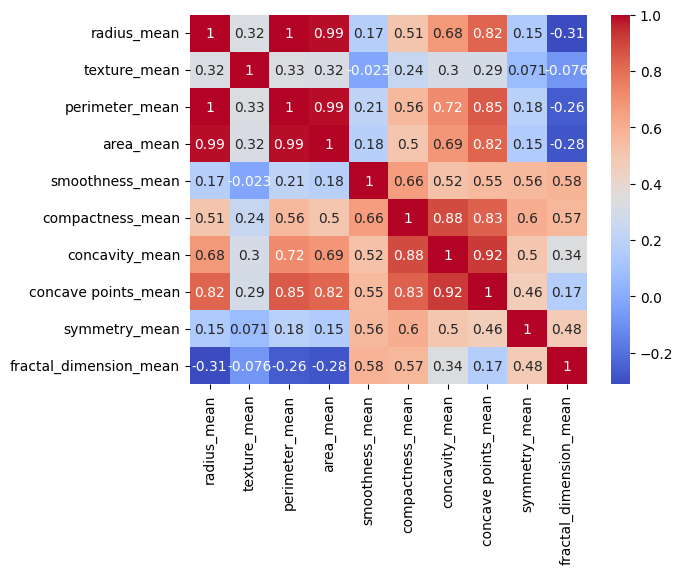

In [14]:
sns.heatmap(data[mean_features].corr(),annot=True,cmap='coolwarm')

<Axes: >

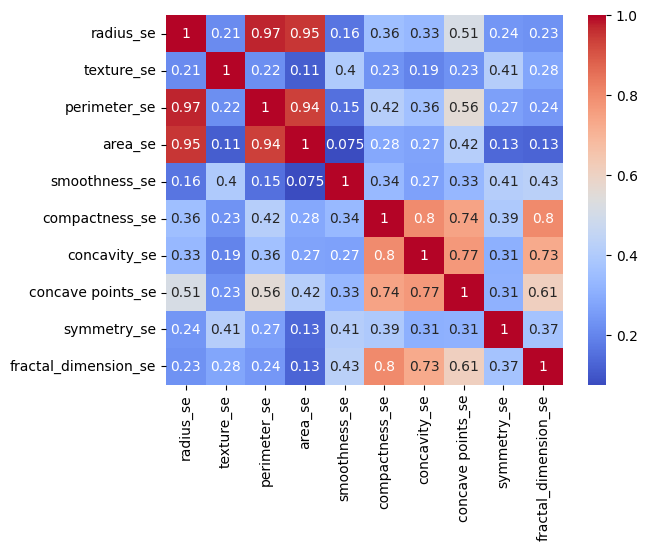

In [15]:
sns.heatmap(data[se_features].corr(),annot=True,cmap='coolwarm')

<Axes: >

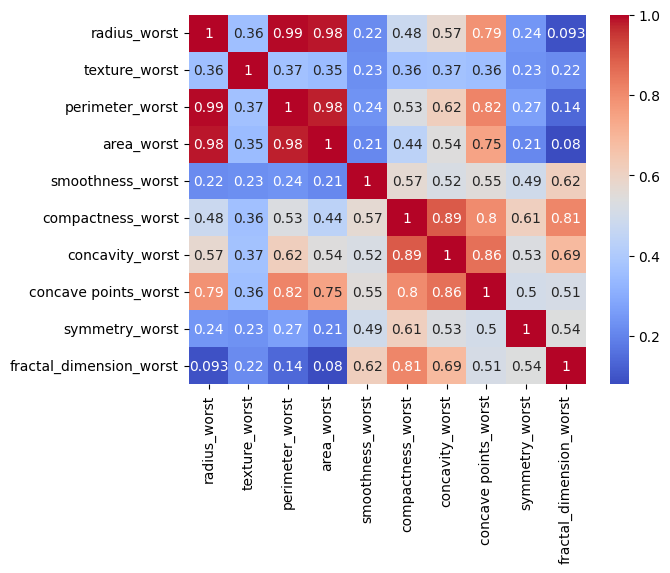

In [16]:
sns.heatmap(data[worst_features].corr(),annot=True,cmap='coolwarm')

Correlation Conclusion

- The dark red boxes are those associated with two highly correlated features.
- It is therefore possible to delete some of them which do not bring any added value to our data set.

- The features 'radius', 'perimeter' and 'area' are strongly correlated,which is not surprising given the geometrical relationship by which they are linked. I decide to keep only the 'perimeter' variable.
- Also, the variables 'compactness', 'concavity' and 'concavepoint' are strongly correlated so we will only use 'compactness_mean', 'compactness_se' and 'compactness_worst' in our case.

In [17]:
#deleting features higly corrolated described above

col_to_drop_corrolated1=['radius_mean','radius_se','radius_worst','area_mean','area_se','area_worst']
col_to_drop_corrolated2=['concavity_mean','concave points_mean', 'concavity_se','concave points_se' ,'concavity_worst','concave points_worst']
data.drop(col_to_drop_corrolated1+col_to_drop_corrolated2,axis=1,inplace=True)
print('I keep only ', len(data.columns) ,' features which are not so corrolated based on the previous analysis')

I keep only  19  features which are not so corrolated based on the previous analysis


Univariate analysis on each features to discover those which allow to discretize the variable 'diagnosis'.

- **benign**:- benign tumors generally don't invade and spread
- **malignan** :- malignant cells are more likely to metastasize, or travel to other areas of the body

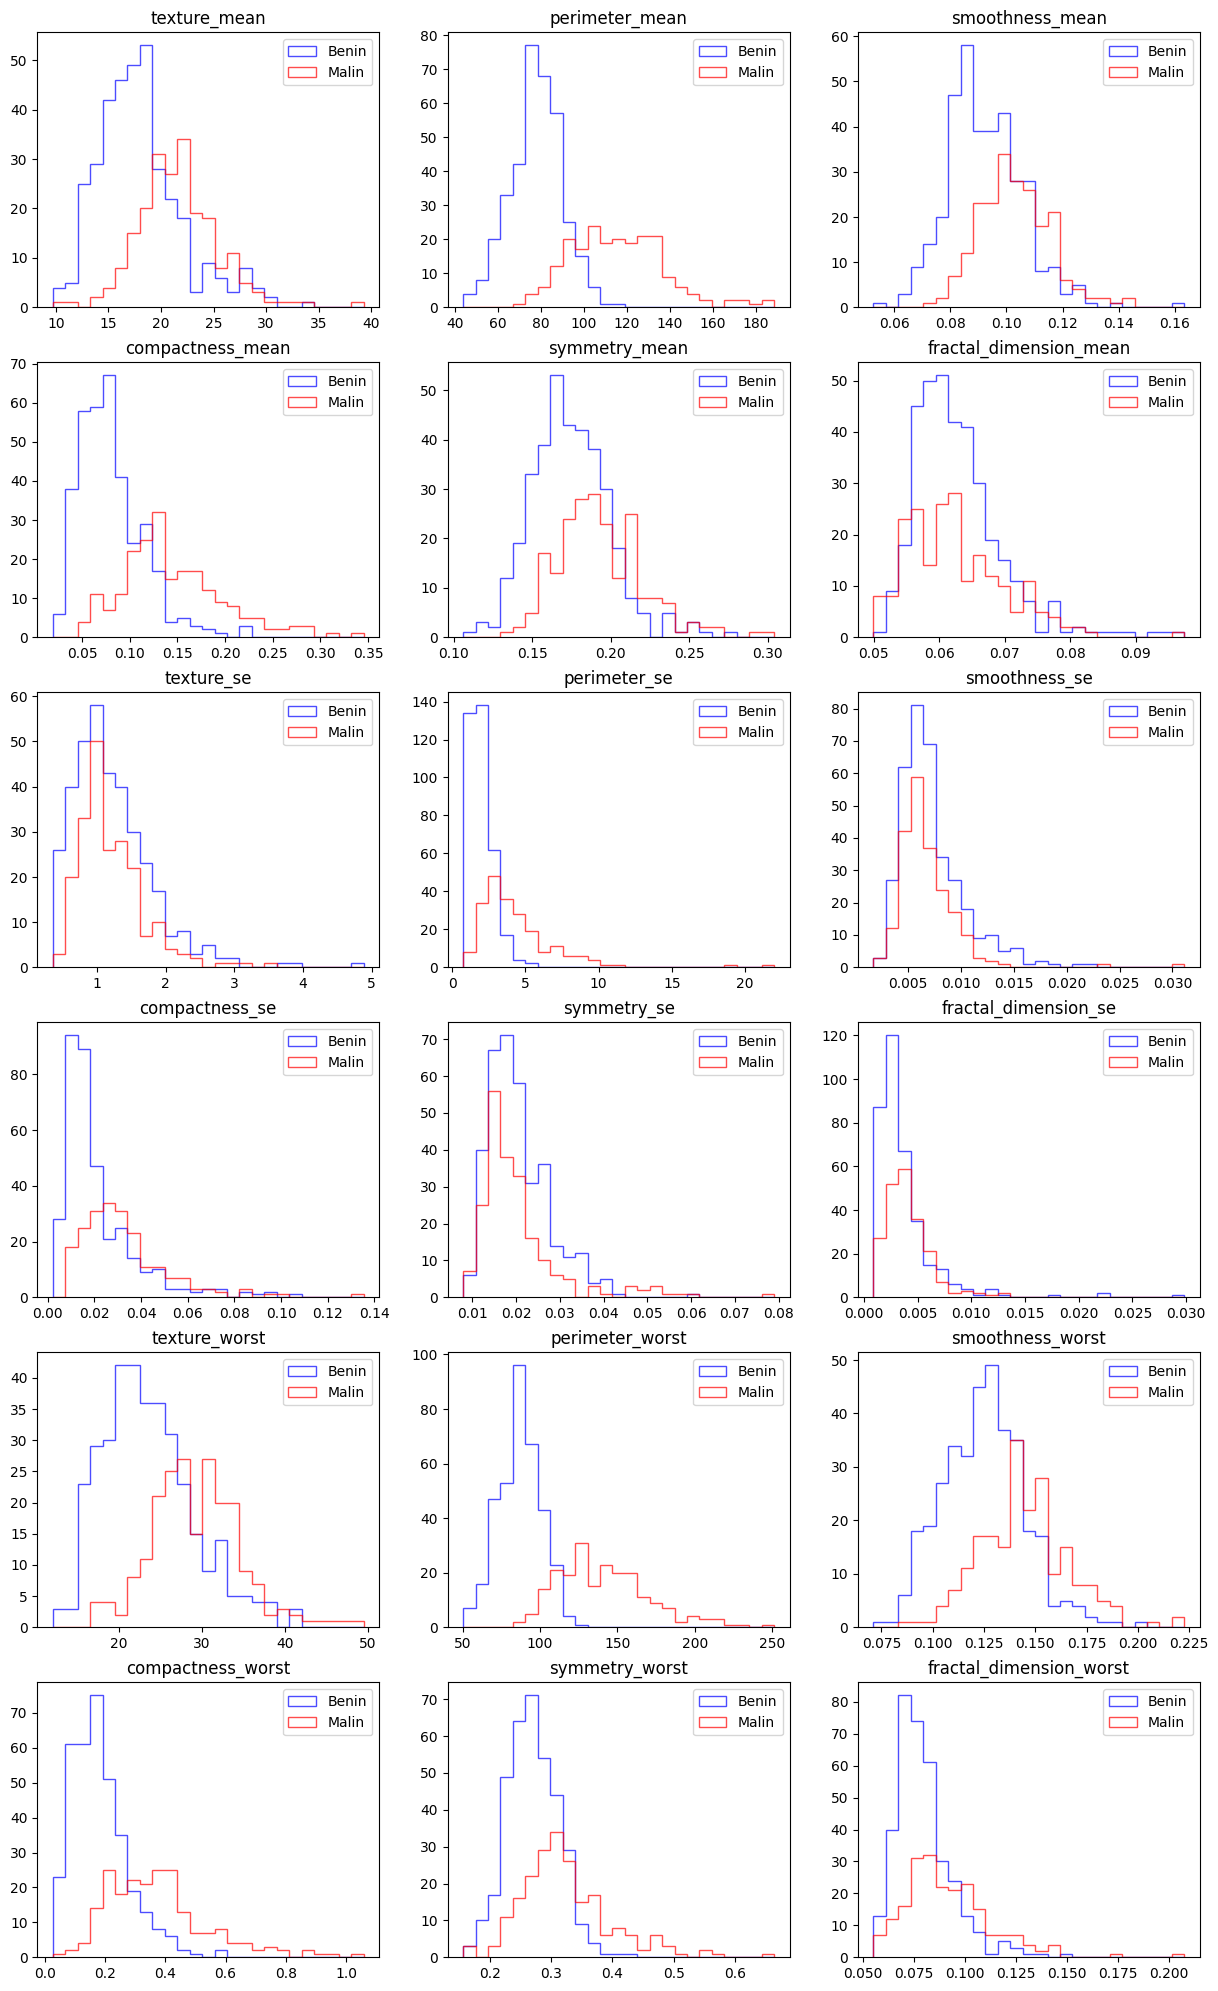

In [18]:
predict = data.diagnosis.unique() # unique values from diagnosis features : 1 and 0
predict_n=['Malin', 'Benin'] # labels

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,25)) # axis configuration : 18 features on 6 * 3 charts
i=0
axes = axes.ravel()
for idx,ax in enumerate(axes): # for each chart
    col=data.columns[i+1]
    i=i+1
    ax.hist([data.loc[data.diagnosis == x, col] for x in predict], label=predict_n, bins=25,stacked=False, alpha=0.7,color=['r','b'], histtype='step') # plot the feature histogram
    ax.legend(loc='upper right') # legend of each chart
    ax.set_title(col) # title

plt.show()

Univariate analysis conclusion

some variables allow more easily than others to discriminate between cancerous and healthy cells.

For example the variables: "compactness_mean", "compactness_worst" or "perimeter mean" have a big influence on the final prediction compared to other variables such as "fractal_dimension_mean", "symmetry mean", "smoothness mean" or "texture_mean".

We will therefore remove these features because they do not allow us to determine if a tumor is cancerous or not.

In [19]:
col_to_drop_mean=['fractal_dimension_mean','symmetry_mean','smoothness_mean','texture_mean'] # mean variables not efficient for detection
col_to_drop_se=['fractal_dimension_se','symmetry_se','smoothness_se','texture_se'] #Standard error variables not efficient for detection
col_to_drop_worst=['fractal_dimension_worst'] # worst variable not efficient for detection
col_to_drop_tot=col_to_drop_mean+col_to_drop_se+col_to_drop_worst
data.drop(col_to_drop_tot,axis=1,inplace=True)
print('Now the data set is only composed of ',len(data.columns),'features')

Now the data set is only composed of  10 features


Study of the correlation on the remaining features (to verify the quality of previous work)

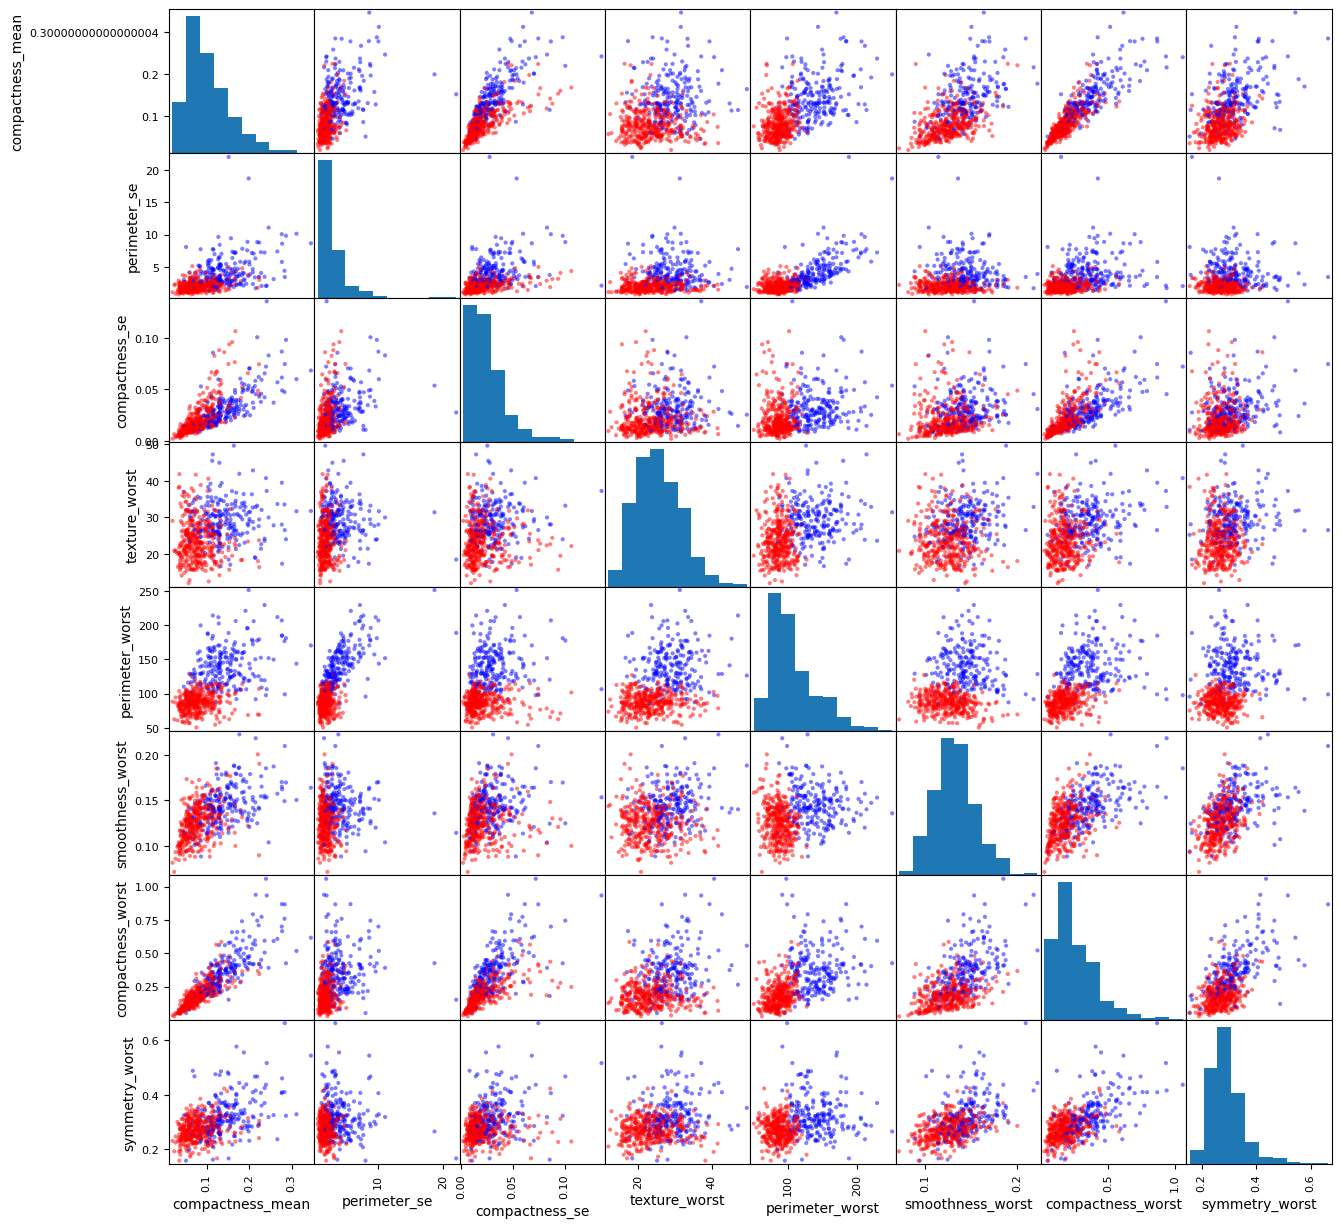

In [20]:
color_function = {0:'red', 1:'blue'}
colors=data['diagnosis'].map(lambda x: color_function.get(x))
pd.plotting.scatter_matrix(data.iloc[:,2:], c=colors,alpha=0.5, figsize=(15,15));

Most of the remaining features are now poorly correlated with each other, except perhaps for a few exceptions in the "texture" variables.

The general idea is to get good results while facilitating the analysis.

Conclusion on features selection :

In [21]:
print('the most important final feature for brest cancer detection are :')
list(data.columns.values[1:])

the most important final feature for brest cancer detection are :


['perimeter_mean',
 'compactness_mean',
 'perimeter_se',
 'compactness_se',
 'texture_worst',
 'perimeter_worst',
 'smoothness_worst',
 'compactness_worst',
 'symmetry_worst']

the main characteristics of a cell that allow us to predict whether or not it is cancerous are :

- **the perimeter,**
- **the symmetry,**
- **the compactness,**
- **the smoothness.**

#Machine Learning Algorithm

Applying Machine Learning Algorithms on the above data in order to detect cancerous cells.

 applying 4 algorithms :
 - DecisionTree,
 - SVM,
 - K-Nearest Neighbors (KNN),
 - RandomForestClassifier.

In [22]:
from sklearn.preprocessing import StandardScaler # To norm the data

train, test = train_test_split(data, test_size = 0.3)# main data is splitted into train and test set

# As we are going to use many models lets make a function which we can use with different models
def classification_model(model,data,prediction_input,output):

    #Fit the model:
    train, test = train_test_split(data, test_size = 0.3) # in this our main data is splitted into train (70%) and test (30%) into the function (local variables)
    train_X = train[prediction_input] # taking the training data input
    train_y=train.diagnosis # This is output of our training data

    # same for data test
    test_X= test[prediction_input] # taking test data inputs
    test_y =test.diagnosis   #output value of test data

    # norm the data with mean of 0 and standard deviation of 1
    sc = StandardScaler() # sklearn object
    sc.fit_transform(data[prediction_input])
    train_X = sc.transform(train_X) #transform train set with the scaler method
    test_X = sc.transform(test_X) # transform test set with scaler method

    model.fit(train_X,train_y) #Here we fit the model using training set

    #Make predictions on test set:
    predictions = model.predict(test_X)

    # Check accuracy
    accuracy = metrics.accuracy_score(predictions,test_y)
    print("Accuracy on test set : %s" % "{0:.3%}".format(accuracy))

    # Cross validation on 5 random folds
    kf = KFold(n_splits=5)

    error = []
    print(kf)
    print('  ')

    # For each folds, we fit the model and compute the accuracy, to prevent overfitting
    for train, test in kf.split(data):
        # as the data is divided into train and test using KFold
        # so here also we are going to fit model
        #in the cross validation the data in train and test will change for evry iteration
        train_X = (data[prediction_input].iloc[train,:])# this iloc method is used for selecting trainig data
        train_y = data[output].iloc[train]# here is only column so it repersenting only row in train

        train_X = sc.transform(train_X) # Scale the train data

        # Training the algorithm using the predictors and target.
        model.fit(train_X, train_y)

        # now do this for test data also
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        test_X = sc.transform(test_X)

        # compute the score on test set
        error.append(model.score(test_X,test_y))

        # printing the score
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

Try on differents models :

**Decision Tree Classifier**

In [23]:
model = DecisionTreeClassifier()
prediction_var=data.columns[2:]
outcome_var= "diagnosis"
classification_model(model,data,prediction_var,outcome_var)

Accuracy on test set : 89.474%
KFold(n_splits=5, random_state=None, shuffle=False)
  
Cross-Validation Score : 92.982%
Cross-Validation Score : 93.860%
Cross-Validation Score : 94.444%
Cross-Validation Score : 94.956%
Cross-Validation Score : 93.487%


**SVM**

In [24]:
model = svm.SVC()
classification_model(model,data,prediction_var,outcome_var)

Accuracy on test set : 95.322%
KFold(n_splits=5, random_state=None, shuffle=False)
  
Cross-Validation Score : 93.860%
Cross-Validation Score : 94.737%
Cross-Validation Score : 95.322%
Cross-Validation Score : 96.272%
Cross-Validation Score : 95.779%


**KNN**

In [25]:
model = KNeighborsClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy on test set : 91.228%
KFold(n_splits=5, random_state=None, shuffle=False)
  
Cross-Validation Score : 92.982%
Cross-Validation Score : 93.860%
Cross-Validation Score : 94.444%
Cross-Validation Score : 95.395%
Cross-Validation Score : 94.192%


**RandomForest Classifier**

In [26]:
model = RandomForestClassifier(n_estimators=100)
classification_model(model,data,prediction_var,outcome_var)

Accuracy on test set : 98.246%
KFold(n_splits=5, random_state=None, shuffle=False)
  
Cross-Validation Score : 91.228%
Cross-Validation Score : 94.298%
Cross-Validation Score : 95.322%
Cross-Validation Score : 95.395%
Cross-Validation Score : 94.900%


optimizing it with a Grid Search CV to tune hyperparameter

In [27]:
# Making a function for Grid Search CV
def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):

    clf = GridSearchCV(model,param_grid,cv=10,scoring="accuracy")
    # this is how we use grid serch CV we are giving our model : we gave parameters those we want to tune
    # Cv is for cross validation

    # Fit all models with all hyperparameter configuration
    clf.fit(train_X,train_y)
    print("The best parameter found on development set is :")

    # this will give us our best parameter to use
    print(clf.best_params_)
    print("the best estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")

    # this is the best score that we can achieve using these parameters
    print(clf.best_score_*100, '%')

In [28]:
#now split our data into train and test
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test

train_X = train[prediction_var]# taking the training data input
train_y=train.diagnosis# This is output of our training data

# same for test set
test_X= test[prediction_var] # taking test data inputs
test_y =test.diagnosis   #output value of test data

# scale data
sc = StandardScaler()
sc.fit_transform(data[prediction_var])
train_X = sc.transform(train_X)
test_X = sc.transform(test_X)

# Here we have to take parameters that are used for SVM Classifier
    # C: Regularization parameter. The strength of the regularization is inversely proportional to C.
    # kernel : Specifies the kernel type to be used in the algorithm.

param_grid = {'C': [0.65,0.75,0.8,1],
              'kernel': [ 'linear','poly','rbf','sigmoid'],
                }
# here our gridasearchCV will take all combinations of these parameter and apply it to model
# and then it will find the best parameter for model
model= svm.SVC()
Classification_model_gridsearchCV(model,param_grid,train_X,train_y) # call the function

The best parameter found on development set is :
{'C': 0.75, 'kernel': 'linear'}
the best estimator is 
SVC(C=0.75, kernel='linear')
The best score is 
96.98076923076924 %


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(train_X, train_y)

# Output the best parameters and accuracy
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation Score for Random Forest:", grid_search_rf.best_score_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 200}
Best Cross-Validation Score for Random Forest: 0.9597151898734179


In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN model
model_knn = KNeighborsClassifier()

# Use GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_knn.fit(train_X, train_y)

# Output the best parameters and accuracy
print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("Best Cross-Validation Score for KNN:", grid_search_knn.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Score for KNN: 0.9470886075949367


In [31]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2)
grid_search_dt.fit(train_X, train_y)

# Output the best parameters and accuracy
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Cross-Validation Score for Decision Tree:", grid_search_dt.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}
Best Cross-Validation Score for Decision Tree: 0.9472151898734177


Machine Learning Conclusion

- The best Machine Learning model tested is : SVM (C = 0.65, kernel = 'rbf')

computeing some metrics with this model : (precision, recall, F1-score), confusion matrix and ROC curve

In [32]:
model=svm.SVC(C=0.65, kernel='rbf')# our best classifier
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)# predict for the test data

# here we use accuracy measurement between our predicted value and our test output values
print('------------------------')
print('Accuracy score : ', metrics.accuracy_score(prediction,test_y)*100, ' %') # to check the accuracy
print('------------------------')

------------------------
Accuracy score :  96.49122807017544  %
------------------------


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision quantifies the number of positive class predictions that actually belong to the positive class.
precision = precision_score(test_y, prediction, average='binary')

# Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
recall = recall_score(test_y, prediction, average='binary')

# F-Measure provides a single score that balances both the concerns of precision and recall.
score = f1_score(test_y, prediction, average='binary')

print('Precision : ',precision *100 ,' %')
print('------------------------')
print('Recall : ' ,recall*100 ,' %') # Best score to considerate in our case beacause Recall is appropriate when minimizing False Negatives.
print('------------------------')
print('F1_score : ', score*100 ,' %')


Precision :  100.0  %
------------------------
Recall :  91.78082191780823  %
------------------------
F1_score :  95.71428571428571  %


The best score to considerate is the Recall because in cancer detetcion we want to minimize False Negatives (e.g : prediction of a non-cancerous tumor when it is)

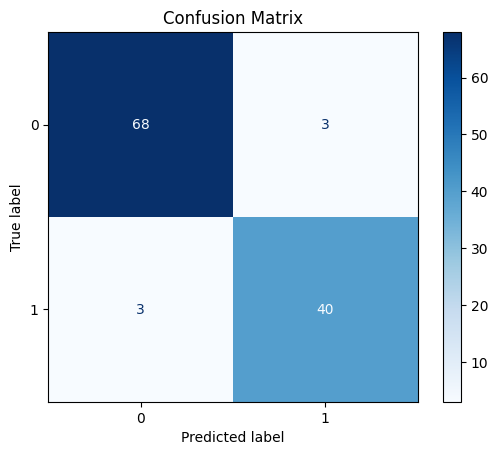

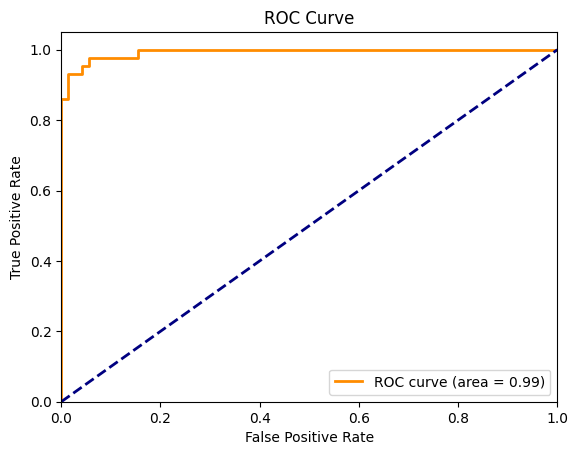

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Selecting features and outcome variable
prediction_var = data.columns[1:]  # Adjust as needed based on your data structure
outcome_var = "diagnosis"  # Replace with the actual name of your target variable

# Splitting the data into training and testing sets
X = data[prediction_var]
y = data[outcome_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initializing and fitting the model with probability=True
model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

# Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Summary Machine Learning

- Good accuracy with only 9 features : 98.24% (We make the right prediction in 98.24% of the cases)

- Good Recall : 96.77 % but it is not 100% so we do not detect all cancerous tumor ! It is very problematic !

- So, the main problem is that a cancerous tumor is not detected in all cases. ( X patients are not detected as having a cancerous tumor : Value at the bottom left in the confusion matrix).


#Conclusion

it is almost impossible to obtain 100% good predictions, so the real issue is how to deal with cases where the algorithm predicts that a patient is healthy when in fact he has a cancerous tumor?

Fully automating the breast cancer detection process is still impossible with the techniques mentioned above, although we are getting closer and closer to 100% accuracy.